# Relational Data
## Source: https://paleobiodb.org/

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import plotly.express as px
import random
import seaborn as sns
import plotly.figure_factory as ff

In [4]:
# load the Taxon data
df = pd.read_csv("Crocodylomorpha_Data.csv")
df

occurrence_no record_type  reid_no flags  collection_no   
0             30261         occ  22457.0   NaN           2225  \
1             30690         occ  22459.0   NaN           2237   
2             40163         occ  18506.0   NaN           3113   
3             40167         occ      NaN   NaN           3113   
4             40168         occ      NaN   NaN           3113   
...             ...         ...      ...   ...            ...   
5427        1628546         occ      NaN   NaN         230676   
5428        1628971         occ      NaN   NaN          56157   
5429        1628999         occ      NaN   NaN         147191   
5430        1629196         occ      NaN   NaN         230753   
5431        1629252         occ      NaN   NaN         230759   

                  identified_name identified_rank  identified_no   
0          Crocodylomorpha indet.  unranked clade         209375  \
1          Crocodylomorpha indet.  unranked clade         209375   
2               Crocodylia indet.  unranked clade          38309   
3        Thoracosaurus basifissus         species         216615   
4     Thoracosaurus basitruncatus         species         216614   
...                           ...             ...            ...   
5427         Peirosauridae indet.  unranked clade         373244   
5428            Notosuchia indet.      infraorder         157794   
5429            Caimaninae indet.  unranked clade         194769   
5430   Alligator mississippiensis         species         110824   
5431            Caimaninae indet.  unranked clade         194769   

        difference               accepted_name  ...     authorizer   
0              NaN             Crocodylomorpha  ...       J. Alroy  \
1              NaN             Crocodylomorpha  ...       J. Alroy   
2              NaN                  Crocodylia  ...       J. Alroy   
3     nomen dubium                 Gavialoidea  ...  M. Patzkowsky   
4     nomen dubium                 Gavialoidea  ...  M. Patzkowsky   
...            ...                         ...  ...            ...   
5427           NaN               Peirosauridae  ...     P. Mannion   
5428           NaN                  Notosuchia  ...     M. Carrano   
5429           NaN                  Caimaninae  ...     P. Holroyd   
5430           NaN  Alligator mississippiensis  ...     P. Holroyd   
5431           NaN                  Caimaninae  ...     P. Holroyd   

           enterer    modifier           created          modified   
0         J. Alroy         NaN  11/24/2009 20:16  11/24/2009 22:16  \
1         J. Alroy         NaN  11/24/2009 20:18  11/24/2009 22:18   
2         J. Alroy         NaN  10/15/2006 11:06  10/15/2006 13:06   
3         K. Layou     M. Uhen   7/26/1999 10:49   8/15/2019 13:47   
4         K. Layou     M. Uhen   7/26/1999 10:49   8/15/2019 13:47   
...            ...         ...               ...               ...   
5427    P. Mannion  P. Mannion   7/11/2023 11:53   7/11/2023 11:53   
5428    M. Carrano  M. Carrano   7/14/2023 13:15   7/14/2023 13:15   
5429  K. Magoulick         NaN   7/14/2023 14:44   7/14/2023 14:44   
5430  K. Magoulick         NaN   7/17/2023 15:20   7/17/2023 15:20   
5431  K. Magoulick         NaN   7/18/2023 14:02   7/18/2023 14:02   

      paleomodel                         geoplate  paleoage  paleolng   
0        gplates                              305       mid     25.43  \
1        gplates                              305       mid     27.08   
2        gplates                              109       mid    -44.51   
3        gplates                              109       mid    -44.51   
4        gplates                              109       mid    -44.51   
...          ...                              ...       ...       ...   
5427     gplates                              201       mid    -29.17   
5428     gplates                              291       mid    -43.41   
5429     gplates  not computable using this model       mid       NaN

In [5]:
df.columns

Index(['occurrence_no', 'record_type', 'reid_no', 'flags', 'collection_no',
       'identified_name', 'identified_rank', 'identified_no', 'difference',
       'accepted_name', 'accepted_attr', 'accepted_rank', 'accepted_no',
       'early_interval', 'late_interval', 'max_ma', 'min_ma', 'reference_no',
       'lng', 'lat', 'cc', 'state', 'county', 'latlng_basis',
       'latlng_precision', 'geogscale', 'geogcomments', 'protected',
       'cx_int_no', 'formation', 'stratgroup', 'member', 'formation.1',
       'stratgroup.1', 'member.1', 'stratscale', 'zone', 'localsection',
       'localbed', 'localbedunit', 'localorder', 'regionalsection',
       'regionalbed', 'regionalbedunit', 'regionalorder', 'stratcomments',
       'lithdescript', 'lithology1', 'lithadj1', 'lithification1',
       'minor_lithology1', 'fossilsfrom1', 'lithology2', 'lithadj2',
       'lithification2', 'minor_lithology2', 'fossilsfrom2', 'lithdescript.1',
       'lithology1.1', 'lithadj1.1', 'lithification1.1', 'minor

In [6]:
df.nunique()

occurrence_no    5432
record_type         1
reid_no           609
flags               3
collection_no    3863
                 ... 
paleomodel          1
geoplate           55
paleoage            1
paleolng         2338
paleolat         2132
Length: 85, dtype: int64

In [8]:
# years from current to 541 MA in millions of years
years = range(1, int(df["max_ma"].max())) 
years

range(1, 237)

In [9]:
# Create a new dataframe, iterating over the years

# Remove any NaN values
dfExtinct = pd.DataFrame(years, columns=["years ma"])

#dfExtinct["extinct"] = 
dfExtinct.head()

years ma
0         1
1         2
2         3
3         4
4         5

In [30]:
# Create a midpoint of firat apperence and last apperance

# Mark all occurances after palecene thermal maximum
df["mid"] = ((df["max_ma"] + df["min_ma"]) / 2)
df["pre_petm"] = df["min_ma"] > 55
# Revomve missing
df = df.dropna(subset=["mid","paleolat"])

# Convert to float
df["mid"] = df["mid"].astype(float)


In [42]:
# bin the data for lat/long and midpoints
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 200]
labels = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 200]
df['mid_binned'] = pd.cut(df['mid'], bins=bins, labels=labels)

In [50]:
grouped = df.groupby(["accepted_name","cc","mid_binned"]).count()
grouped.head(20)

occurrence_no  record_type   
accepted_name                cc mid_binned                               
Acherontisuchus guajiraensis AA 10                      0            0  \
                                20                      0            0   
                                30                      0            0   
                                40                      0            0   
                                50                      0            0   
                                60                      0            0   
                                70                      0            0   
                                80                      0            0   
                                90                      0            0   
                                100                     0            0   
                                125                     0            0   
                                150                     0            0   
                                200                     0            0   
                             AE 10                      0            0   
                                20                      0            0   
                                30                      0            0   
                                40                      0            0   
                                50                      0            0   
                                60                      0            0   
                                70                      0            0   

                                            reid_no  flags  collection_no   
accepted_name                cc mid_binned                                  
Acherontisuchus guajiraensis AA 10                0      0              0  \
                                20                0      0              0   
                                30                0      0              0   
                                40                0      0              0   
                                50                0      0              0   
                                60                0      0              0   
                                70                0      0              0   
                                80                0      0              0   
                                90                0      0              0   
                                100               0      0              0   
                                125               0      0              0   
                                150               0      0              0   
                                200               0      0              0   
                             AE 10                0      0              0   
                                20                0      0              0   
                                30                0      0              0   
                                40                0      0              0   
                                50                0      0              0   
                                60                0      0              0   
                                70                0      0              0   

                                            identified_name  identified_rank   
accepted_name                cc mid_binned                                     
Acherontisuchus guajiraensis AA 10                        0                0  \
                                20                        0                0   
                                30                        0                0   
                                40                        0                0   
                                50                        0                0   
                                60                        0                0   
                                70                        0                0   


In [43]:
df[["accepted_name","mid","paleolat","cc","pre_petm","mid_binned"]].tail(20)

accepted_name        mid  paleolat  cc  pre_petm   
5408                    Purussaurus    7.90000    -31.47  AR     False  \
5409  Dentaneosuchus crassiproratus   39.65000     37.10  FR     False   
5410                     Crocodylia   77.05000     46.86  US      True   
5411                     Crocodylia   77.05000     46.86  US      True   
5414                 Teleosauroidea  196.05000     23.35  MA      True   
5415                    Hsisosuchus  160.40000     31.58  CN      True   
5416                      Elosuchus   99.40000     25.84  MA      True   
5417        Borealosuchus griffithi   64.65000     58.42  CA      True   
5418      Borealosuchus sternbergii   64.65000     58.48  CA      True   
5419                 Alligatoroidea   64.65000     58.48  CA      True   
5420                 Alligatoroidea   77.05000     48.64  US      True   
5421                    Sarcosuchus   99.40000     20.13  DZ      True   
5422                   Leidyosuchus   68.30000     53.97  US      True   
5423                  Brachychampsa   68.30000     53.97  US      True   
5424                     Crocodylia   68.30000     53.97  US      True   
5425                Crocodylomorpha   77.05000     29.85  IT      True   
5426     Toyotamaphimeia taiwanicus    1.35700     23.04  TW     False   
5427                  Peirosauridae   74.75000    -24.81  BR      True   
5428                     Notosuchia   84.65000    -38.60  AR      True   
5431                     Caimaninae    1.29985    -21.07  BR     False   

     mid_binned  
5408         10  
5409         40  
5410         80  
5411         80  
5414        200  
5415        200  
5416        100  
5417         70  
5418         70  
5419         70  
5420         80  
5421        100  
5422         70  
5423         70  
5424         70  
5425         80  
5426         10  
5427         80  
5428         90  
5431         10

<Axes: xlabel='paleolat', ylabel='paleolng'>

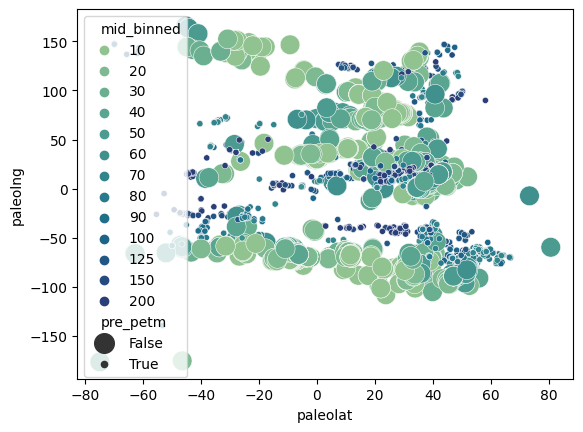

In [51]:
# Create seaborn chart

# Set the style
sns.scatterplot(
        data=df, x="paleolat", y="paleolng", 
        hue="mid_binned", size="pre_petm",
        palette="crest",
        sizes=(20, 200), legend="full"
)

In [255]:
# Force spacing in the labels and adjust font size
d=fig.to_dict()
data = d['data'][0]

for i, l in enumerate(data['labels']):
    v = data['customdata'][i][0]
    is_leaf = len(data['ids'][i].split('/')) == 3

    is_root = len(data['ids'][i].split('/')) == 1

    if is_leaf:
        data['labels'][i] = f" {l} "
    elif is_root:
        data['labels'][i] = f'<span style="font-size: 24px;"><b>{l}</b></span>'
    else:
        data['labels'][i] = f'<span style="font-size: 12px;">{l}</span>'


In [212]:
d

{'data': [{'branchvalues': 'total',
   'customdata': array([[ 69.05      ],
          [ 69.05      ],
          [151.93600671],
          [125.93      ],
          [ 74.75      ],
          [ 75.94166941],
          [132.825     ],
          [152.4555428 ],
          [151.15      ],
          [152.27750951],
          [112.29328258],
          [ 76.72624375],
          [144.3       ],
          [ 77.07000779],
          [ 76.14667674],
          [165.9       ],
          [ 72.52064941],
          [212.21665488],
          [ 77.09375355],
          [147.20895697],
          [ 76.52528182],
          [ 77.1       ],
          [151.93600671],
          [ 74.75      ],
          [ 75.66778042],
          [ 69.05      ],
          [214.65      ],
          [154.25      ],
          [107.4       ],
          [ 76.77986602],
          [ 75.73817109],
          [232.5       ],
          [ 74.01803112],
          [ 75.27124635],
          [ 68.3       ],
          [ 77.09500292],
          [188

In [256]:
import plotly.io as pio

pio.show(d)